In [1]:
1 + 1


2

In [2]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 120)

BASE_DIR = Path.cwd().parent  # notebooks/ -> racine projet
DATA_PATH = BASE_DIR / "data" / "raw" / "Churn_Modelling.csv"

assert DATA_PATH.exists(), f"Fichier introuvable: {DATA_PATH}"

df = pd.read_csv(DATA_PATH)
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
print("Shape:", df.shape)
df.columns


Shape: (10000, 14)


Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [4]:
df.info()
df.isna().sum().sort_values(ascending=False).head(30)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
df_eda = df.copy()

drop_candidates = [c for c in ["RowNumber", "CustomerId", "Surname"] if c in df_eda.columns]
df_eda.drop(columns=drop_candidates, inplace=True, errors="ignore")

df_eda.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
target = None
for cand in ["Exited", "Churn", "churn", "Exited "]:
    if cand in df_eda.columns:
        target = cand
        break

assert target is not None, f"Aucune colonne cible trouvée. Colonnes dispo: {list(df_eda.columns)}"
print("Target =", target)


Target = Exited


Taux de churn global: 20.37%


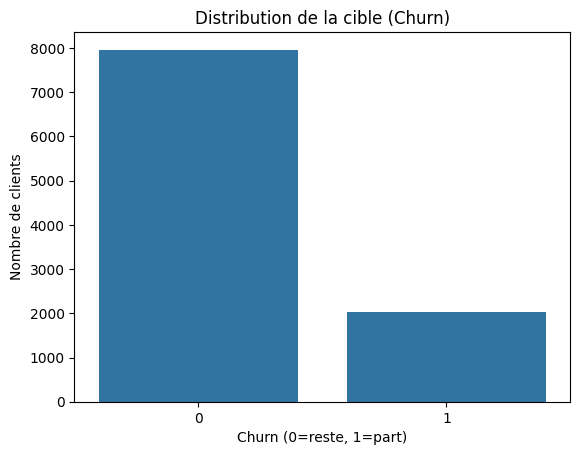

In [7]:
churn_rate = df_eda[target].mean()
print(f"Taux de churn global: {churn_rate:.2%}")

df_eda[target].value_counts()

sns.countplot(x=target, data=df_eda)
plt.title("Distribution de la cible (Churn)")
plt.xlabel("Churn (0=reste, 1=part)")
plt.ylabel("Nombre de clients")
plt.show()


In [8]:
df_eda.describe(include=[np.number]).T


,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [9]:
df_churn = df_eda[df_eda[target] == 1]
df_nochurn = df_eda[df_eda[target] == 0]

print("Clients churn:", df_churn.shape[0])
print("Clients non churn:", df_nochurn.shape[0])


Clients churn: 2037
Clients non churn: 7963


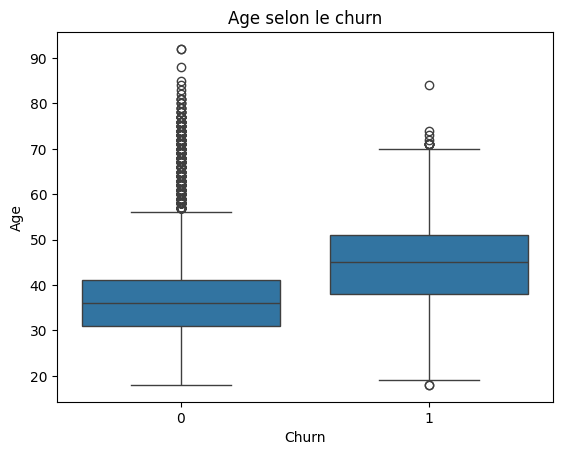

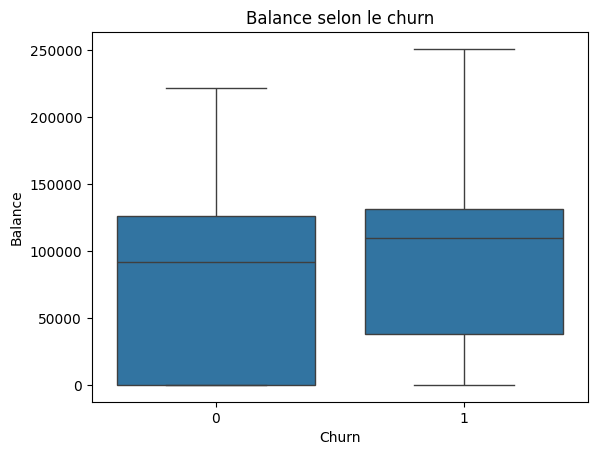

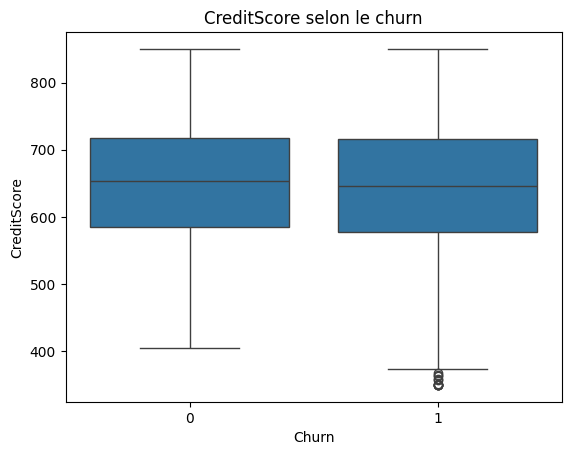

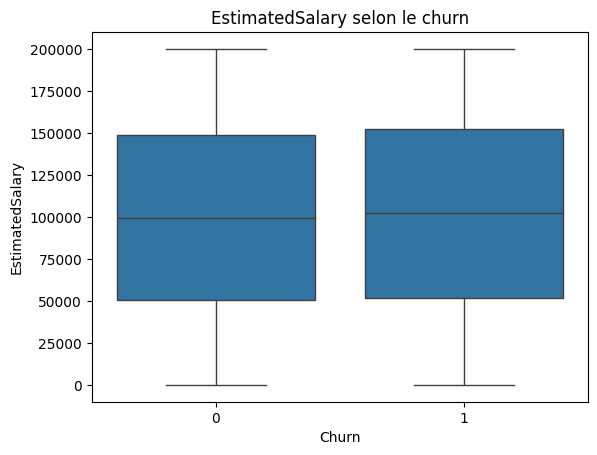

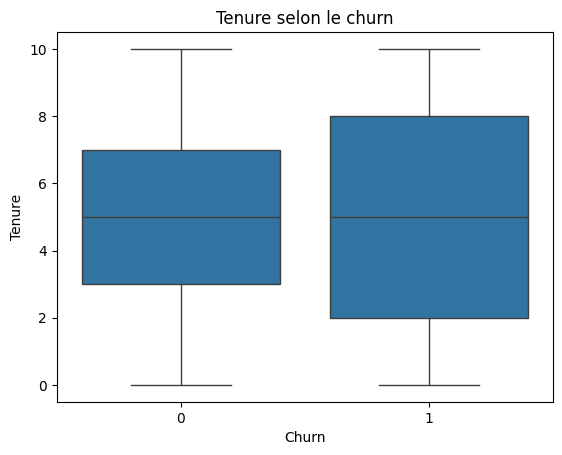

In [17]:
num_cols = df_eda.select_dtypes(include=[np.number]).columns.tolist()
num_cols = [c for c in num_cols if c != target]

# Top colonnes à regarder en priorité (si présentes)
priority = ["Age", "Balance", "CreditScore", "EstimatedSalary", "Tenure"]
num_plot_cols = [c for c in priority if c in num_cols]

# fallback si aucune des colonnes classiques
if not num_plot_cols:
    num_plot_cols = num_cols[:5]

num_plot_cols

for col in num_plot_cols:
    plt.figure()
    sns.boxplot(x=target, y=col, data=df_eda)
    plt.title(f"{col} selon le churn")
    plt.xlabel("Churn")
    plt.ylabel(col)
    plt.show()



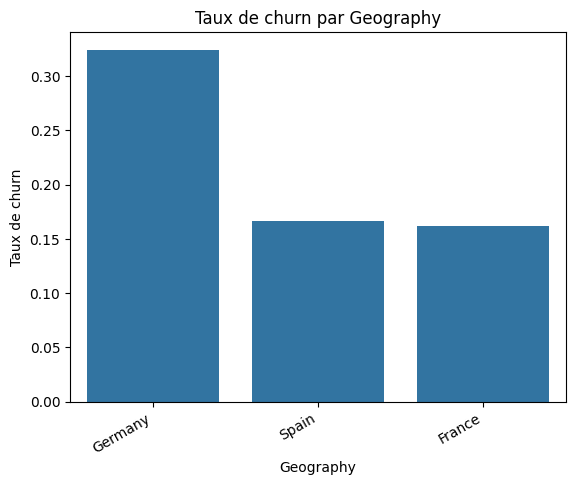

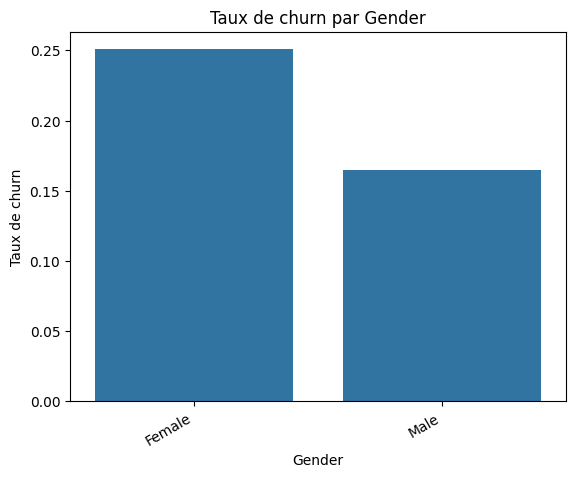

In [12]:
cat_cols = df_eda.select_dtypes(include=["object", "category", "bool"]).columns.tolist()
cat_cols


for col in cat_cols:
    plt.figure()
    # taux de churn par catégorie
    rate = df_eda.groupby(col)[target].mean().sort_values(ascending=False)
    sns.barplot(x=rate.index, y=rate.values)
    plt.title(f"Taux de churn par {col}")
    plt.xlabel(col)
    plt.ylabel("Taux de churn")
    plt.xticks(rotation=30, ha="right")
    plt.show()


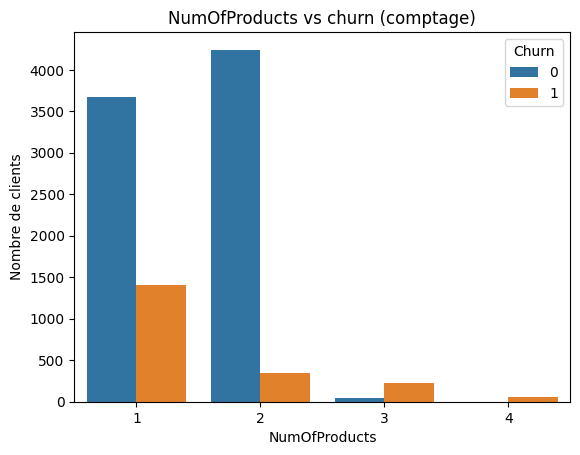

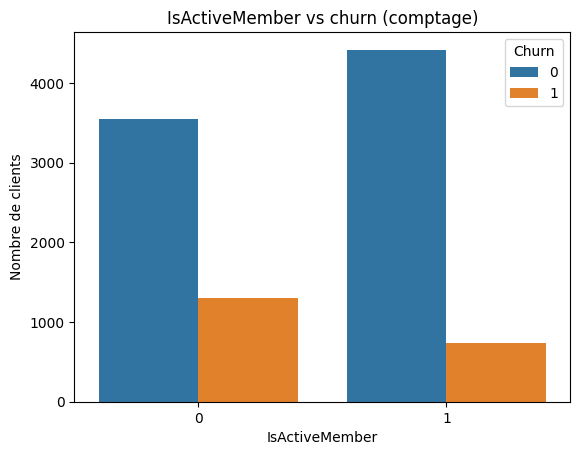

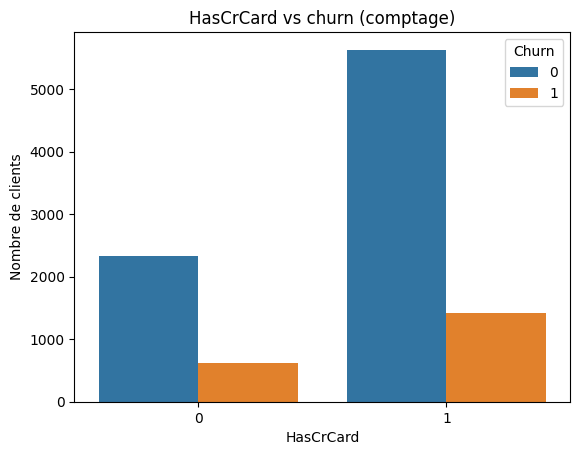

In [18]:
eng_cols = [c for c in ["NumOfProducts", "IsActiveMember", "HasCrCard"] if c in df_eda.columns]
eng_cols

for col in eng_cols:
    plt.figure()

    if df_eda[col].nunique() <= 10:
        sns.countplot(x=col, hue=target, data=df_eda)
        plt.title(f"{col} vs churn (comptage)")
        plt.xlabel(col)
        plt.ylabel("Nombre de clients")
        plt.legend(title="Churn")
        plt.show()
    else:
        rate = df_eda.groupby(col)[target].mean()
        sns.lineplot(x=rate.index, y=rate.values)
        plt.title(f"Taux de churn selon {col}")
        plt.xlabel(col)
        plt.ylabel("Taux de churn")
        plt.show()



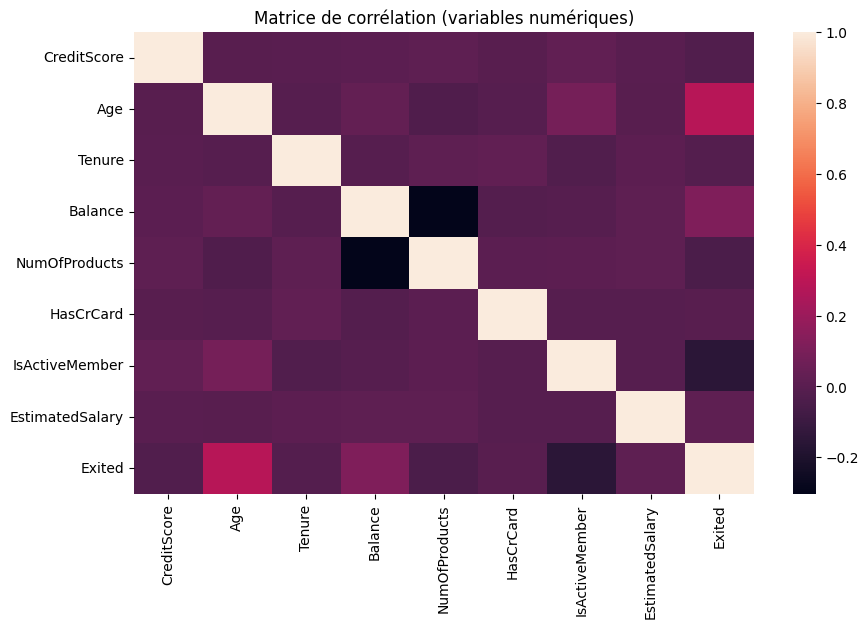

In [14]:
corr = df_eda.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=False)
plt.title("Matrice de corrélation (variables numériques)")
plt.show()


In [15]:
segment_cols = []

# Création de segments si colonnes présentes
if "Age" in df_eda.columns:
    df_eda["AgeBand"] = pd.cut(df_eda["Age"], bins=[17, 30, 40, 50, 60, 100], right=True)
    segment_cols.append("AgeBand")

if "Balance" in df_eda.columns:
    # quantiles
    df_eda["BalanceBand"] = pd.qcut(df_eda["Balance"], q=4, duplicates="drop")
    segment_cols.append("BalanceBand")

if "EstimatedSalary" in df_eda.columns:
    df_eda["SalaryBand"] = pd.qcut(df_eda["EstimatedSalary"], q=4, duplicates="drop")
    segment_cols.append("SalaryBand")

segment_cols

for col in segment_cols:
    pivot = df_eda.groupby(col)[target].agg(["count", "mean"]).sort_values("mean", ascending=False)
    pivot.rename(columns={"count": "n_clients", "mean": "churn_rate"}, inplace=True)
    display(pivot.head(10))


C:\Users\ethan\AppData\Local\Temp\ipykernel_3276\630468926.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot = df_eda.groupby(col)[target].agg(["count", "mean"]).sort_values("mean", ascending=False)


,n_clients,churn_rate
AgeBand,,
"(50, 60]",797,0.562108
"(40, 50]",2320,0.339655
"(60, 100]",464,0.247845
"(30, 40]",4451,0.120872
"(17, 30]",1968,0.075203


C:\Users\ethan\AppData\Local\Temp\ipykernel_3276\630468926.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot = df_eda.groupby(col)[target].agg(["count", "mean"]).sort_values("mean", ascending=False)


,n_clients,churn_rate
BalanceBand,,
"(97198.54, 127644.24]",2500,0.2628
"(127644.24, 250898.09]",2500,0.2368
"(-0.001, 97198.54]",5000,0.1576


C:\Users\ethan\AppData\Local\Temp\ipykernel_3276\630468926.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot = df_eda.groupby(col)[target].agg(["count", "mean"]).sort_values("mean", ascending=False)


,n_clients,churn_rate
SalaryBand,,
"(149388.248, 199992.48]",2500,0.2156
"(100193.915, 149388.248]",2500,0.2012
"(11.579, 51002.11]",2500,0.2000
"(51002.11, 100193.915]",2500,0.1980


## Conclusions EDA (Banking insights)

- **Taux de churn global** : ~ X%
- Les variables les plus discriminantes observées en EDA :
  - (ex) Âge : les clients plus âgés semblent churn davantage
  - (ex) Engagement : les clients non actifs ont un churn plus élevé
  - (ex) Produits : le churn varie fortement selon le nombre de produits
  - (ex) Géographie : différences de churn entre pays

### Implications business
- Cibler en priorité les segments à risque (âge/engagement/produits) avec des actions de rétention :
  - offres personnalisées, conseiller dédié, amélioration onboarding, incentives multi-produits.
- Justifie la mise en place d’un **modèle de prédiction** pour scorer les clients et prioriser les actions.


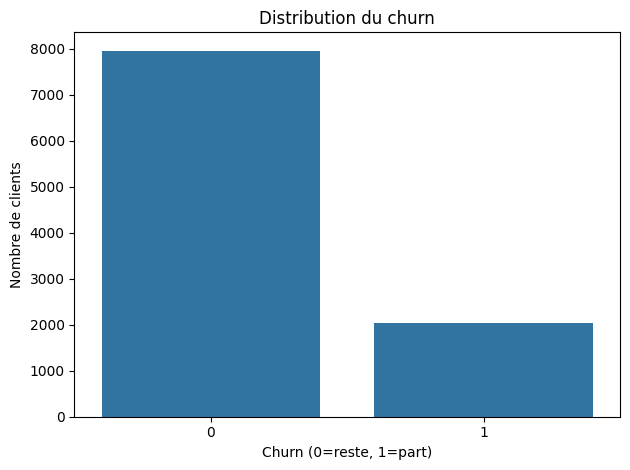

Saved to: c:\Users\ethan\bank-customer-churn-analysis\reports\figures


In [16]:
FIG_DIR = BASE_DIR / "reports" / "figures"
FIG_DIR.mkdir(parents=True, exist_ok=True)

# Exemple: sauvegarder la distribution churn
plt.figure()
sns.countplot(x=target, data=df_eda)
plt.title("Distribution du churn")
plt.xlabel("Churn (0=reste, 1=part)")
plt.ylabel("Nombre de clients")
plt.tight_layout()
plt.savefig(FIG_DIR / "churn_distribution.png", dpi=150)
plt.show()

print("Saved to:", FIG_DIR)
